<a href="https://colab.research.google.com/github/Divs1159/Reinforcement/blob/main/Simple_Cartpole_PPO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install stable-baselines3[extra]

  Using cached ale_py-0.8.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.7 MB)
  Attempting uninstall: ale-py
    Found existing installation: ale-py 0.7.5
    Uninstalling ale-py-0.7.5:
      Successfully uninstalled ale-py-0.7.5


In [2]:
# Rendering Dependencies
!pip install gym pyvirtualdisplay > /dev/null 2>&1
!apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1
# Gym Dependencies
!apt-get update > /dev/null 2>&1
!apt-get install cmake > /dev/null 2>&1
!pip install --upgrade setuptools 2>&1
!pip install ez_setup > /dev/null 2>&1
!pip install gym[atari] > /dev/null 2>&1
!pip install gym[box2d] > /dev/null 2>&1

In [4]:
import gym
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.evaluation import evaluate_policy
from gym.wrappers.record_video import RecordVideo

/usr/local/lib/python3.10/dist-packages/tensorflow/python/framework/dtypes.py:35: DeprecationWarning: ml_dtypes.float8_e4m3b11 is deprecated. Use ml_dtypes.float8_e4m3b11fnuz
  from tensorflow.tsl.python.lib.core import pywrap_ml_dtypes


In [1]:
environment_name = "CartPole-v0"

In [5]:
env = gym.make(environment_name)

/usr/local/lib/python3.10/dist-packages/gym/envs/registration.py:593: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


# **Understanding The Environment**

In [ ]:
env.action_space

In [6]:
# 0-push cart to left, 1-push cart to the right
env.action_space.sample()

1

In [7]:
env.reset()

array([5.3490783e-07, 5.3185611e-03, 3.5888184e-02, 2.5545273e-02],
      dtype=float32)

In [8]:
# [cart position, cart velocity, pole angle, pole angular velocity]
env.observation_space.sample()

array([8.4927511e-01, 3.1260355e+38, 1.7961399e-01, 1.8119396e+38],
      dtype=float32)

In [9]:
#The following code is for rendering on Colab. Do not need this for Jupyter notebook

import gym
from gym import logger as gymlogger
from gym.wrappers.record_video import RecordVideo
gymlogger.set_level(40) #error only
import tensorflow as tf
import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import math
import glob
import io
import base64
from IPython.display import HTML

from IPython import display as ipythondisplay

# Google Colab needs to render the environment to a virtual display
# we will record this as a video and play it after the training has finished
env = gym.make('CartPole-v1', render_mode="rgb_array")
env = RecordVideo(env, './video',  episode_trigger = lambda episode_number: True)
env.reset()

"""
Utility functions to enable video recording of gym environment and displaying it
To enable video, just do "env = wrap_env(env)""
"""

def show_video(mp4_filename):
  mp4list = glob.glob('video/*.mp4')
  if len(mp4list) > 0:
    mp4 = mp4list[-1]
    if mp4_filename:
      print(mp4)
      mp4 = mp4_filename

    video = io.open(mp4, 'r+b').read()
    encoded = base64.b64encode(video)
    ipythondisplay.display(HTML(data='''<video alt="test" autoplay
                controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
  else:
    print("Could not find video")

In [10]:
#This code simply takes random actions, just for your understanding of the our RL algorithms work
env = gym.make('CartPole-v1', render_mode="rgb_array")
env = RecordVideo(env, './video',  episode_trigger = lambda episode_number: True)
env.reset()

episodes = 10
for episode in range(1, episodes+1):
    state = env.reset()
    done = False
    score = 0

    while not done:
        env.render()
        action = env.action_space.sample()
        n_state, reward, done, info = env.step(action)
        score+=reward
    print('Episode:{} Score:{}'.format(episode, score))
env.close()

Episode:1 Score:38.0
Episode:2 Score:14.0
Episode:3 Score:76.0
Episode:4 Score:31.0
Episode:5 Score:26.0
Episode:6 Score:52.0
Episode:7 Score:19.0
Episode:8 Score:13.0
Episode:9 Score:28.0
Episode:10 Score:13.0


In [11]:
show_video('video/rl-video-episode-9.mp4')  #only shows the last run

video/rl-video-episode-4.mp4


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# **Train an RL Model**

In [47]:
#If this code block gives error, try the Vectorized environment
env = gym.make(environment_name)
env = DummyVecEnv([lambda: env])
model = PPO('MlpPolicy', env, verbose = 1)
model.learn(total_timesteps=20000)

/usr/local/lib/python3.10/dist-packages/gymnasium/envs/registration.py:513: DeprecationWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.deprecation(


Using cuda device
-----------------------------
| time/              |      |
|    fps             | 527  |
|    iterations      | 1    |
|    time_elapsed    | 3    |
|    total_timesteps | 2048 |
-----------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 473         |
|    iterations           | 2           |
|    time_elapsed         | 8           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.008098362 |
|    clip_fraction        | 0.108       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.686      |
|    explained_variance   | 0.00297     |
|    learning_rate        | 0.0003      |
|    loss                 | 8.25        |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.0167     |
|    value_loss           | 53.7        |
-----------------------------------------
----------------

In [14]:
import gymnasium as gym

from stable_baselines3 import PPO
from stable_baselines3.common.env_util import make_vec_env

# Parallel environments
vec_env = make_vec_env("CartPole-v1", n_envs=4)

model = PPO("MlpPolicy", vec_env, verbose=1)
model.learn(total_timesteps=25000)


Using cuda device
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 22.2     |
|    ep_rew_mean     | 22.2     |
| time/              |          |
|    fps             | 2296     |
|    iterations      | 1        |
|    time_elapsed    | 3        |
|    total_timesteps | 8192     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 32.7        |
|    ep_rew_mean          | 32.7        |
| time/                   |             |
|    fps                  | 1285        |
|    iterations           | 2           |
|    time_elapsed         | 12          |
|    total_timesteps      | 16384       |
| train/                  |             |
|    approx_kl            | 0.013982605 |
|    clip_fraction        | 0.198       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.682      |
|    explained_variance   | -0.000615   |
|    learnin

# Saving and Reloading Model

In [58]:
Model_path = '/content/ppo_cartpole1'
model.save(Model_path)

del model # remove to demonstrate saving and loading

model = PPO.load(Model_path, env=vec_env)


# Evaluate Model

In [23]:
from stable_baselines3.common.evaluation import evaluate_policy

In [52]:
evaluate_policy(model, vec_env, n_eval_episodes=10, render=True)

(500.0, 0.0)

In [132]:
vec_env.close()

In [59]:
import gym

In [60]:
import torch
import time
import matplotlib.pyplot as plt

In [61]:
from gym.envs.registration import register
register(
    id='FrozenLakeNotSlippery-v0',
    entry_point='gym.envs.toy_text:FrozenLakeEnv',
    kwargs={'map_name' : '4x4', 'is_slippery': False},
)

env = gym.make('FrozenLakeNotSlippery-v0')

# Instantiate the Environment.
# env = gym.make('FrozenLake-v0')

# To check all environments present in OpenAI
# print(envs.registry.all())

env = RecordVideo(env, './video_new',  episode_trigger = lambda episode_number: True)
env.reset()
show_video('video_new/rl-video-episode-0.mp4')  #only shows the last run

video/rl-video-episode-4.mp4


In [74]:
# Total number of States and Actions
number_of_states = env.observation_space.n
number_of_actions = env.action_space.n
print( "States = ", number_of_states)
print( "Actions = ", number_of_actions)

num_episodes = 3000
steps_total = []
rewards_total = []
egreedy_total = []

States =  16
Actions =  4


In [75]:
# exploit vs explore to find action
# Start with 70% random actions to explore the environment
# And with time, using decay to shift to more optimal actions learned from experience

egreedy = 0.7
egreedy_final = 0.1
egreedy_decay = 0.999

In [79]:
# PARAMS

# Discount on reward
gamma = 0.95

# Factor to balance the ratio of action taken based on past experience to current situtation
learning_rate = 0.9

In [76]:
Q = torch.zeros([number_of_states, number_of_actions])
Q

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [80]:
for i_episode in range(num_episodes):

    # resets the environment
    state = env.reset()
    step = 0

    while True:

        step += 1

        random_for_egreedy = torch.rand(1)[0]


        if random_for_egreedy > egreedy:
            random_values = Q[state] + torch.rand(1,number_of_actions) / 1000
            action = torch.max(random_values,1)[1][0]
            action = action.item()
        else:
            action = env.action_space.sample()

        if egreedy > egreedy_final:
            egreedy *= egreedy_decay

        new_state, reward, done, info = env.step(action)

        # Filling the Q Table
        Q[state, action] = reward + gamma * torch.max(Q[new_state])

        # Setting new state for next action
        state = new_state

        # env.render()
        # time.sleep(0.4)

        if done:
            steps_total.append(step)
            rewards_total.append(reward)
            egreedy_total.append(egreedy)
            if i_episode % 10 == 0:
                print('Episode: {} Reward: {} Steps Taken: {}'.format(i_episode,reward, step))
            break

Episode: 0 Reward: 0.0 Steps Taken: 4
Episode: 10 Reward: 0.0 Steps Taken: 5
Episode: 20 Reward: 0.0 Steps Taken: 3
Episode: 30 Reward: 0.0 Steps Taken: 3
Episode: 40 Reward: 0.0 Steps Taken: 5
Episode: 50 Reward: 0.0 Steps Taken: 14
Episode: 60 Reward: 0.0 Steps Taken: 12
Episode: 70 Reward: 0.0 Steps Taken: 7
Episode: 80 Reward: 0.0 Steps Taken: 7
Episode: 90 Reward: 0.0 Steps Taken: 5
Episode: 100 Reward: 0.0 Steps Taken: 21
Episode: 110 Reward: 0.0 Steps Taken: 2
Episode: 120 Reward: 0.0 Steps Taken: 16
Episode: 130 Reward: 0.0 Steps Taken: 12
Episode: 140 Reward: 0.0 Steps Taken: 15
Episode: 150 Reward: 0.0 Steps Taken: 15
Episode: 160 Reward: 1.0 Steps Taken: 16
Episode: 170 Reward: 0.0 Steps Taken: 7
Episode: 180 Reward: 0.0 Steps Taken: 2
Episode: 190 Reward: 0.0 Steps Taken: 4
Episode: 200 Reward: 0.0 Steps Taken: 6
Episode: 210 Reward: 0.0 Steps Taken: 4
Episode: 220 Reward: 0.0 Steps Taken: 16
Episode: 230 Reward: 0.0 Steps Taken: 4
Episode: 240 Reward: 0.0 Steps Taken: 8
Ep

KeyboardInterrupt: ignored

In [66]:
print(Q)

print("Percent of episodes finished successfully: {0}".format(sum(rewards_total)/num_episodes))
print("Percent of episodes finished successfully (last 100 episodes): {0}".format(sum(rewards_total[-100:])/100))

print("Average number of steps: %.2f" % (sum(steps_total)/num_episodes))
print("Average number of steps (last 100 episodes): %.2f" % (sum(steps_total[-100:])/100))

tensor([[0.7351, 0.6983, 0.7738, 0.7351],
        [0.7351, 0.0000, 0.8145, 0.7738],
        [0.7738, 0.8574, 0.7738, 0.8145],
        [0.8145, 0.0000, 0.0000, 0.7738],
        [0.6983, 0.6634, 0.0000, 0.7351],
        [0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.9025, 0.0000, 0.8145],
        [0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.6983],
        [0.0000, 0.9025, 0.9025, 0.0000],
        [0.8574, 0.9500, 0.0000, 0.8574],
        [0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.9025, 0.9500, 0.0000],
        [0.9025, 0.9500, 1.0000, 0.9025],
        [0.0000, 0.0000, 0.0000, 0.0000]])
Percent of episodes finished successfully: 0.785
Percent of episodes finished successfully (last 100 episodes): 0.89
Average number of steps: 6.54
Average number of steps (last 100 episodes): 6.24


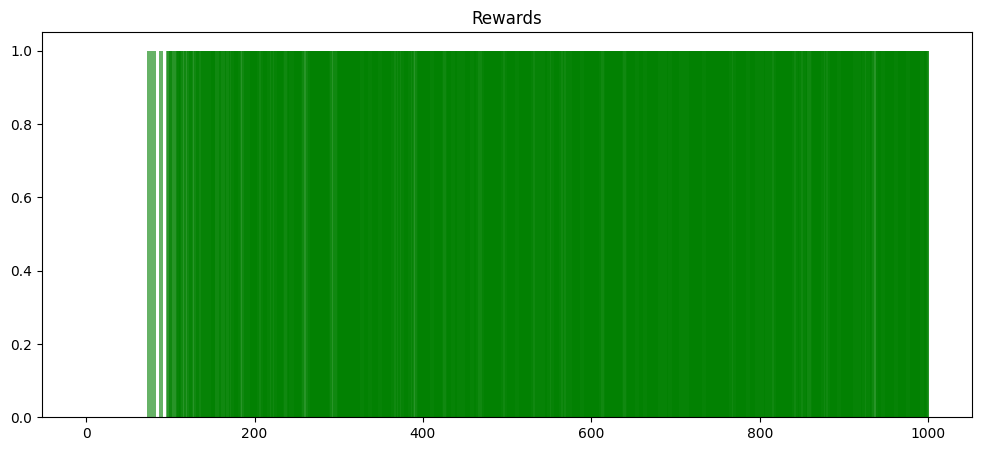

In [67]:
plt.figure(figsize=(12,5))
plt.title("Rewards")
plt.bar(torch.arange(len(rewards_total)), rewards_total, alpha=0.6, color='green', width=5)
plt.show()

In [25]:
show_video('video2/rl-video-episode-4.mp4')  #only shows the last run

video/rl-video-episode-4.mp4
